In [10]:
import tensorflow as tf
tf.__version__

'1.5.0'

In [13]:
hello = tf.constant("Hello, TensorFlow")

sess = tf.Session()

print(sess.run(hello))

b'Hello, TensorFlow'


## Computational Graph

In [14]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [15]:
print("node1:", node1,"node2 :", node2 )
print("node3: ", node3)

node1: Tensor("Const_2:0", shape=(), dtype=float32) node2 : Tensor("Const_3:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


In [16]:
sess = tf.Session()
print("sess.run(node1, node2):", sess.run([node1, node2]))
print("sess.run(node3):", sess.run(node3))

sess.run(node1, node2): [3.0, 4.0]
sess.run(node3): 7.0


1. Build graph using TensorFlow operations
2. feed data and run graph (operation) sess.run (op)
3. update variables in the graph (and return values)

## Placeholder

In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict={a : 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


1. Build graph using TesorFlow operations
2. feed data and run graph (operation) sess.run(op, feed_dict={x:x_data})
3. update variables in the graph (and return values)

In [18]:
# H(x) = Wx + b
import tensorflow as tf

x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight') # trainable
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#our hypothesis XW+b
hypothesis = x_train * W + b

In [19]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) 

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost) # 노드 생성 트레인 실행시켜야 코스트를 미니마이즈 한다

In [22]:
# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 9.334533 [0.07782293] [-1.1166579]
20 0.13040823 [1.1369774] [-0.6173201]
40 0.042755608 [1.2272654] [-0.54575884]
60 0.03814513 [1.2257949] [-0.5160586]
80 0.034637805 [1.2160603] [-0.49142]
100 0.03145856 [1.20599] [-0.46828836]
120 0.028571153 [1.1963171] [-0.4462771]
140 0.025948793 [1.1870916] [-0.42530343]
160 0.023567073 [1.178299] [-0.40531555]
180 0.021404015 [1.1699196] [-0.38626716]
200 0.019439468 [1.1619341] [-0.36811405]
220 0.017655244 [1.1543237] [-0.35081407]
240 0.016034758 [1.1470711] [-0.334327]
260 0.014563031 [1.1401592] [-0.3186149]
280 0.013226378 [1.1335722] [-0.30364114]
300 0.012012396 [1.1272948] [-0.28937107]
320 0.010909854 [1.1213125] [-0.2757717]
340 0.009908511 [1.1156112] [-0.26281148]
360 0.008999064 [1.110178] [-0.25046033]
380 0.008173097 [1.105] [-0.23868965]
400 0.007422944 [1.1000655] [-0.22747226]
420 0.006741654 [1.0953628] [-0.21678194]
440 0.006122867 [1.0908811] [-0.20659402]
460 0.0055608875 [1.08661] [-0.19688483]
480 0.005050486 [1.0825

In [23]:
# Full 소스 코드
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

w = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bise')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 8.509334 [-0.2927314] [-0.13395439]
20 0.094264366 [0.73946595] [0.29968074]
40 0.016396629 [0.84421027] [0.32628784]
60 0.014264122 [0.86033964] [0.3148281]
80 0.012949211 [0.8677419] [0.30040124]
100 0.011760627 [0.8740373] [0.28631857]
120 0.010681192 [0.87996477] [0.272866]
140 0.009700822 [0.8856067] [0.2600426]
160 0.00881043 [0.89098287] [0.2478215]
180 0.00800177 [0.8961063] [0.2361748]
200 0.00726735 [0.90098894] [0.22507551]
220 0.006600322 [0.90564203] [0.21449777]
240 0.005994515 [0.91007656] [0.20441715]
260 0.00544431 [0.91430265] [0.19481027]
280 0.004944619 [0.91833013] [0.18565491]
300 0.0044907746 [0.9221683] [0.1769298]
320 0.0040785917 [0.9258261] [0.16861475]
340 0.0037042473 [0.929312] [0.1606905]
360 0.0033642622 [0.93263406] [0.15313865]
380 0.0030554694 [0.9358] [0.1459417]
400 0.0027750286 [0.93881714] [0.13908297]
420 0.0025203205 [0.9416926] [0.13254656]
440 0.0022889976 [0.94443274] [0.1263174]
460 0.0020789069 [0.9470442] [0.12038098]
480 0.0018880988 [0

In [24]:
# PlaceHolders

import tensorflow as tf

# X and Y data
#x_train = [1, 2, 3]
#y_train = [1, 2, 3]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bise')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line
for step in range(2001):
    #sess.run(train)
    cost_val, W_val, b_val, _=\
        sess.run([cost, W, b, train],
                feed_dict = {X:[1,2,3],Y:[1,2,3]})
    if step % 20 == 0:
        #print(step, sess.run(cost), sess.run(W), sess.run(b))
        print(step, cost_val, W_val, b_val)

0 0.25341395 [1.3172162] [-0.26481915]
20 0.017175142 [1.1580485] [-0.31583372]
40 0.013667725 [1.1368845] [-0.3070334]
60 0.012395714 [1.1291434] [-0.29317933]
80 0.011257845 [1.1229496] [-0.27945584]
100 0.010224551 [1.1171595] [-0.26632762]
120 0.0092860935 [1.1116523] [-0.2538116]
140 0.00843379 [1.106405] [-0.24188341]
160 0.007659692 [1.1014041] [-0.23051575]
180 0.006956653 [1.0966387] [-0.21968232]
200 0.006318132 [1.0920969] [-0.2093581]
220 0.0057382383 [1.0877688] [-0.19951901]
240 0.0052115615 [1.083644] [-0.1901424]
260 0.0047332137 [1.0797129] [-0.18120632]
280 0.004298778 [1.0759667] [-0.17269024]
300 0.0039042188 [1.0723966] [-0.16457443]
320 0.0035458785 [1.0689942] [-0.15684007]
340 0.00322042 [1.0657518] [-0.14946917]
360 0.002924839 [1.0626616] [-0.1424447]
380 0.0026563844 [1.0597166] [-0.13575025]
400 0.0024125732 [1.0569103] [-0.12937042]
420 0.0021911324 [1.0542357] [-0.12329046]
440 0.0019900205 [1.0516869] [-0.11749627]
460 0.0018073715 [1.0492576] [-0.1119744

In [25]:
# Full code with PlaceHolders

import tensorflow as tf

# X and Y data
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])
w = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bise')

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line with new training data
for step in range(2001):
    #sess.run(train)
    cost_val, W_val, b_val, _=sess.run([cost, W, b, train],
        feed_dict = {X:[1,2,3,4,5],Y:[2.1,3.1,4.1,5.1,6.1]})
    if step % 20 == 0:
        #print(step, sess.run(cost), sess.run(W), sess.run(b))
        print(step, cost_val, W_val, b_val)

0 151.41434 [-1.9506824] [1.5303649]
20 0.21796922 [0.68818486] [2.1795788]
40 0.187661 [0.7196521] [2.111936]
60 0.16388577 [0.7380621] [2.045678]
80 0.1431228 [0.7552168] [1.983745]
100 0.124990225 [0.7712478] [1.9258679]
120 0.109154835 [0.786229] [1.8717811]
140 0.09532583 [0.800229] [1.8212366]
160 0.08324878 [0.8133121] [1.7740024]
180 0.072701715 [0.82553846] [1.7298615]
200 0.06349103 [0.836964] [1.6886115]
220 0.05544721 [0.8476414] [1.6500628]
240 0.048422378 [0.85761946] [1.6140387]
260 0.0422877 [0.8669441] [1.580374]
280 0.036930174 [0.875658] [1.5489141]
300 0.032251365 [0.8838013] [1.5195142]
320 0.028165406 [0.89141124] [1.4920398]
340 0.024597038 [0.8985228] [1.466365]
360 0.021480728 [0.9051686] [1.4423712]
380 0.0187593 [0.9113793] [1.4199489]
400 0.016382616 [0.91718316] [1.3989949]
420 0.014307035 [0.92260695] [1.3794135]
440 0.012494437 [0.9276755] [1.3611143]
460 0.010911448 [0.93241215] [1.3440133]
480 0.009529027 [0.93683857] [1.3280327]
500 0.008321782 [0.9409

In [26]:
# Testing our model
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

[6.099489]
[3.6004076]
[2.6007748 4.6000404]


### Gradient(경사) descent(하강) algorithm(알고리즘)
* Minimaze cost function
* Gradient descent is used many minimization problems
* For a given cost function, cost(W, b), it will find W, b to minimize cost
* It can be applied to more general function:
    cost (w1, w2, ...)

 ### How it works?
 
 * Start with initial guesses
     - strat at 0, 0(or any other value)
     - Keeping changing W and b a little bit to try and reduce cost(W, b)
 * Each time you change the parameters, you select the gradient which reduces cost(W, b) the most possible
 * Repeat
 * Do so until you converge to a local minimum
 * Has an intersting property
     - Where you start can determine which minimum you end up

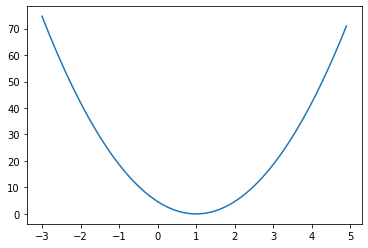

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

# X and Y data
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis XW+b
hypothesis = X * W

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [32]:
# Minimaze: Gradient Descent using derivative : W -= Learning_rate * derivative
import tensorflow as tf

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

AttributeError: 'Tensor' object has no attribute 'asign'

In [46]:
# PlaceHolders

import tensorflow as tf

# X and Y data
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for Linear model X * W
hypothesis = X * W

# cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimaze: Gradient Descent using derivative : W -= Learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Minimize : Gradient Descent Magic
#optomizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
#train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line
for step in range(31):
    sess.run(update, feed_dict={X : x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict = {X : x_data, Y : y_data}), sess.run(W))

0 7.009119 [0.29243276]
1 1.9937056 [0.6226308]
2 0.5670984 [0.79873645]
3 0.16130799 [0.8926594]
4 0.04588312 [0.9427517]
5 0.013051212 [0.9694676]
6 0.003712323 [0.9837161]
7 0.0010559557 [0.99131525]
8 0.00030035665 [0.9953681]
9 8.543671e-05 [0.9975296]
10 2.4303998e-05 [0.99868244]
11 6.9128632e-06 [0.9992973]
12 1.9658282e-06 [0.99962527]
13 5.5925625e-07 [0.99980015]
14 1.5900957e-07 [0.9998934]
15 4.5308028e-08 [0.99994314]
16 1.2897022e-08 [0.99996966]
17 3.6470347e-09 [0.99998385]
18 1.0488357e-09 [0.99999136]
19 2.9654146e-10 [0.9999954]
20 8.4487084e-11 [0.99999756]
21 2.3149482e-11 [0.9999987]
22 7.1622708e-12 [0.9999993]
23 1.5489832e-12 [0.99999964]
24 3.872458e-13 [0.9999998]
25 2.9842795e-13 [0.9999999]
26 7.460699e-14 [0.99999994]
27 0.0 [1.]
28 0.0 [1.]
29 0.0 [1.]
30 0.0 [1.]


In [43]:
import tensorflow as tf

# X and Y data
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-5.0)

# Our hypothesis for Linear model X * W
hypothesis = X * W

# cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize : Gradient Descent Magic
optomizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

# Fit the Line
for step in range(200):
    print(step, sess.run(W))
    sess.run(train)

0 -5.0
1 -3.3200002
2 -2.1104002
3 -1.2394881
4 -0.61243147
5 -0.16095066
6 0.16411552
7 0.39816317
8 0.56667745
9 0.6880078
10 0.7753656
11 0.8382632
12 0.8835495
13 0.91615564
14 0.93963206
15 0.9565351
16 0.9687053
17 0.97746783
18 0.9837768
19 0.9883193
20 0.9915899
21 0.99394476
22 0.9956402
23 0.996861
24 0.9977399
25 0.99837273
26 0.99882835
27 0.9991564
28 0.9993926
29 0.9995627
30 0.9996851
31 0.99977326
32 0.99983674
33 0.99988246
34 0.99991536
35 0.9999391
36 0.99995613
37 0.9999684
38 0.9999773
39 0.99998367
40 0.99998826
41 0.99999154
42 0.9999939
43 0.9999956
44 0.99999684
45 0.99999774
46 0.9999984
47 0.9999988
48 0.99999917
49 0.9999994
50 0.9999996
51 0.9999997
52 0.99999976
53 0.9999998
54 0.9999999
55 0.99999994
56 0.99999994
57 0.99999994
58 0.99999994
59 0.99999994
60 0.99999994
61 0.99999994
62 0.99999994
63 0.99999994
64 0.99999994
65 0.99999994
66 0.99999994
67 0.99999994
68 0.99999994
69 0.99999994
70 0.99999994
71 0.99999994
72 0.99999994
73 0.99999994
74 0.99

 ## Multivariable linear refression

In [52]:
import tensorflow as tf

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

# placeholers for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name = 'weight1')
w2 = tf.Variable(tf.random_normal([1]), name = 'weight2')
w3 = tf.Variable(tf.random_normal([1]), name = 'weight3')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize : Gradient Descent Magic
optomizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "cost: ", cost_val, "\n prediction: \n", hy_val)


0 cost:  275897.3 
 prediction: 
 [-57.100746 -65.86938  -66.363045 -71.700356 -50.04305 ]
10 cost:  inf 
 prediction: 
 [-5.5278927e+35 -6.6441141e+35 -6.5465593e+35 -7.1290396e+35
 -5.0677862e+35]
20 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
30 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
40 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
50 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
60 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
70 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
80 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
90 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
100 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
110 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
120 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
130 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
140 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
150 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
160 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
170 cost:  nan

1580 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1590 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1600 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1610 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1620 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1630 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1640 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1650 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1660 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1670 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1680 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1690 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1700 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1710 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1720 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1730 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1740 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1750 cost:  nan 
 prediction: 
 [nan nan nan nan nan]
1760 cost:  nan 
 prediction

In [50]:
import tensorflow as tf

x_data = [[73., 80., 75.],[93., 88., 93.],[89., 91.,90.],[96., 98., 100.],[73.,66.,70]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholers for a tensor that will be always fed.
x = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')
hypothesis = tf.matmul(x, w) + b

# cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize : Gradient Descent Magic
optomizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
#Initializes gLobaL vaiables in the graph
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={x: x_data, y: y_data})
    if step % 10 == 0:
        print(step, "cost: ", cost_val, "\n prediction: \n", hy_val)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_28' with dtype float
	 [[Node: Placeholder_28 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_28', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sumjack/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/home/sumjack/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sumjack/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sumjack/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/sumjack/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/sumjack/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/sumjack/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sumjack/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3242, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/sumjack/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-676b86cb03c1>", line 11, in <module>
    Y = tf.placeholder(tf.float32)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 3141, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_28' with dtype float
	 [[Node: Placeholder_28 = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [58]:
x_data = [[1,2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]


X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [66]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X : x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict= {X: x_data, Y: y_data})
    
print("\nHypothesis:", h, "\nCorrect (Y): ", c, "\nAccuracy : ", a)

0 2.1886454
200 0.99161226
400 0.7785861
600 0.681765
800 0.62895447
1000 0.59358877
1200 0.5660982
1400 0.54267514
1600 0.52165085
1800 0.5022368
2000 0.48403597
2200 0.46683708
2400 0.45051968
2600 0.435009
2800 0.42025328
3000 0.40621248
3200 0.39285207
3400 0.38014054
3600 0.36804757
3800 0.35654363
4000 0.3455999
4200 0.33518812
4400 0.32528087
4600 0.31585145
4800 0.3068738
5000 0.29832336
5200 0.29017654
5400 0.28241062
5600 0.27500427
5800 0.26793692
6000 0.2611895
6200 0.25474378
6400 0.24858272
6600 0.24269032
6800 0.23705135
7000 0.23165165
7200 0.2264779
7400 0.22151764
7600 0.21675913
7800 0.21219136
8000 0.2078042
8200 0.20358782
8400 0.19953322
8600 0.19563197
8800 0.19187595
9000 0.18825789
9200 0.18477066
9400 0.18140775
9600 0.17816304
9800 0.17503071
10000 0.17200518

Hypothesis: [[0.04074367]
 [0.17052335]
 [0.34963843]
 [0.7616087 ]
 [0.9264395 ]
 [0.9758671 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy :  1.0


In [6]:
import numpy as np
import tensorflow as tf

x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X : x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X : x_data, Y : y_data}), sess.run(W))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict= {X: x_data, Y: y_data})
    print("\nHypothesis:", h, "\nCorrect (Y): ", c, "\nAccuracy : ", a)

0 0.76530993 [[-0.6285459]
 [-1.1614517]]
100 0.7245858 [[-0.5319566 ]
 [-0.81958133]]
200 0.7077319 [[-0.38609746]
 [-0.5401327 ]]
300 0.6998356 [[-0.2732744 ]
 [-0.35564506]]
400 0.6961991 [[-0.19081852]
 [-0.23484094]]
500 0.6945373 [[-0.1320716 ]
 [-0.15559328]]
600 0.69378 [[-0.09085397]
 [-0.10342061]]
700 0.6934353 [[-0.06222456]
 [-0.06893802]]
800 0.6932783 [[-0.04247705]
 [-0.0460635 ]]
900 0.6932069 [[-0.02892448]
 [-0.03084044]]
1000 0.69317436 [[-0.01965832]
 [-0.02068185]]
1100 0.6931596 [[-0.01334085]
 [-0.01388763]]
1200 0.6931528 [[-0.00904312]
 [-0.00933522]]
1300 0.69314975 [[-0.00612435]
 [-0.00628039]]
1400 0.6931484 [[-0.0041447 ]
 [-0.00422804]]
1500 0.69314766 [[-0.0028034 ]
 [-0.00284793]]
1600 0.6931474 [[-0.00189533]
 [-0.00191911]]
1700 0.6931473 [[-0.00128096]
 [-0.00129367]]
1800 0.6931472 [[-0.00086551]
 [-0.0008723 ]]
1900 0.6931472 [[-0.00058468]
 [-0.00058831]]
2000 0.6931472 [[-0.00039489]
 [-0.00039683]]
2100 0.6931472 [[-0.00026671]
 [-0.00026774]]


In [9]:
import numpy as np
import tensorflow as tf

x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#W = tf.Variable(tf.random_normal([2, 1]), name = 'weight')
#b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Neural Net
with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name = 'weight1')
    b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    
    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)

with tf.name_scope("layer1") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
    b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    
    w2_hist = tf.summary.histogram("weights1", W2)
    b2_hist = tf.summary.histogram("biases1", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X : x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X : x_data, Y : y_data}), sess.run([W1, W2]))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict= {X: x_data, Y: y_data})
    print("\nHypothesis:", h, "\nCorrect (Y): ", c, "\nAccuracy : ", a)

0 0.792322 [array([[ 1.6111429 , -0.8311001 ],
       [-0.8964359 , -0.27018827]], dtype=float32), array([[-0.65419716],
       [ 0.5283318 ]], dtype=float32)]
200 0.6952596 [array([[ 1.601494  , -0.73541355],
       [-0.8530075 , -0.14213707]], dtype=float32), array([[-0.20202257],
       [ 0.64851356]], dtype=float32)]
400 0.6940806 [array([[ 1.6180606 , -0.69910455],
       [-0.82261276, -0.06847222]], dtype=float32), array([[-0.10800723],
       [ 0.5941042 ]], dtype=float32)]
600 0.6935323 [array([[ 1.6273445 , -0.67877346],
       [-0.80912095, -0.00659937]], dtype=float32), array([[-0.04533681],
       [ 0.5588496 ]], dtype=float32)]
800 0.6932262 [array([[ 1.6301745 , -0.6694655 ],
       [-0.80543864,  0.04749228]], dtype=float32), array([[0.00063248],
       [0.5367245 ]], dtype=float32)]
1000 0.69300264 [array([[ 1.6274174 , -0.66860074],
       [-0.8088707 ,  0.09647702]], dtype=float32), array([[0.03890285],
       [0.5239968 ]], dtype=float32)]
1200 0.6927769 [array([[ 1.

In [13]:
summary = tf.summary.merge_all()

In [14]:
writer = tf.summary.FileWriter('./TaeSik')
writer.add_graph(sess.graph)

In [15]:
s, _ =sess.run([summary,oprimizer] feed_dict = feed_dict) 
writer.add_summary(s, global_step=100)
global_step += 1

SyntaxError: invalid syntax (<ipython-input-15-8dacf40e5847>, line 1)

In [ ]:
class Model:
    
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()
        
    def _build_net(self):
        with tf.variable_scope(self.name):
            # input place holders
            self.X = th.placeholder(tf.float32, [None, 784])
            # img 28x28x1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])
            
            # L1 ImgIn shape = (?, 28, 28, 1)
            W1 = tf. 